In [16]:
import pandas as pd
import os
# %pip install pandas-profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt



In [3]:
pwd = os.getcwd()


In [10]:
orders = pd.read_csv(pwd + '/data_orders.csv')
orders
orders_copy = orders.copy()


In [11]:
orders_copy.columns

Index(['order_datetime', 'origin_longitude', 'origin_latitude', 'm_order_eta',
       'order_gk', 'order_status_key', 'is_driver_assigned_key',
       'cancellations_time_in_seconds'],
      dtype='object')

In [12]:
orders_copy


,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0


In [25]:
profile = ProfileReport(dataset_copy)
profile.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
offers = pd.read_csv(pwd + '/data_offers.csv')
offers
offers_copy = offers.copy()

In [14]:
offers_copy.columns


Index(['order_gk', 'offer_id'], dtype='object')

In [15]:
offers_copy

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196
...,...,...
334358,3000552921666,300050611632
334359,3000593796526,300051443024
334360,3000590955748,300051340498
334361,3000557510943,300050772593


In [19]:
orders_copy['order_datetime'] = pd.to_datetime(orders_copy['order_datetime'])
orders_copy
orders_copy['hour'] = orders_copy['order_datetime'].dt.hour
orders_copy

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,hour
0,2023-09-28 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18
1,2023-09-28 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,20
2,2023-09-28 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,12
3,2023-09-28 13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,13
4,2023-09-28 21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,21
...,...,...,...,...,...,...,...,...,...
10711,2023-09-28 13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0,13
10712,2023-09-28 13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0,13
10713,2023-09-28 13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0,13
10714,2023-09-28 13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0,13


In [21]:
failed_orders = orders_copy[orders_copy['order_status_key'] == 4]
hourly_failed_counts = failed_orders['hour'].value_counts().sort_index()

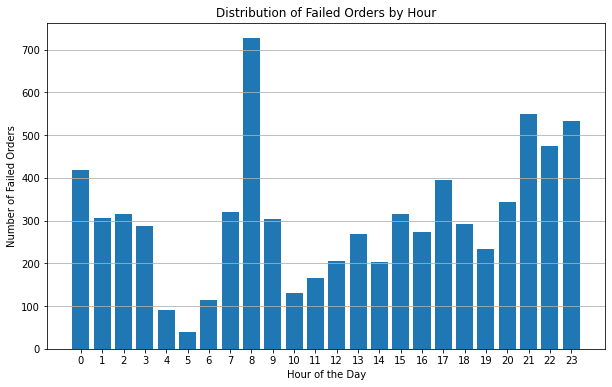

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(hourly_failed_counts.index, hourly_failed_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Failed Orders')
plt.title('Distribution of Failed Orders by Hour')
plt.xticks(hourly_failed_counts.index)
plt.grid(axis='y')
plt.show()

To plot the distribution of failed orders by hours and analyze whether there are certain hours with an abnormally high proportion of failed orders

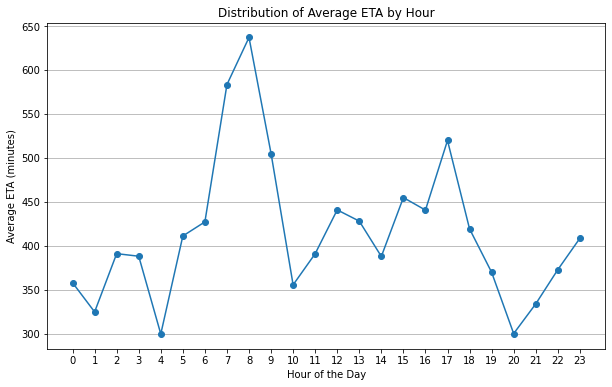

In [24]:
hourly_avg_eta = orders_copy.groupby('hour')['m_order_eta'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_eta.index, hourly_avg_eta.values, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Average ETA (minutes)')
plt.title('Distribution of Average ETA by Hour')
plt.xticks(hourly_avg_eta.index)
plt.grid(axis='y')
plt.show()


The resulting plot will show you the distribution of orders by failure reason. You can analyze the plot to identify which category has the highest number of orders and understand the reasons behind it.

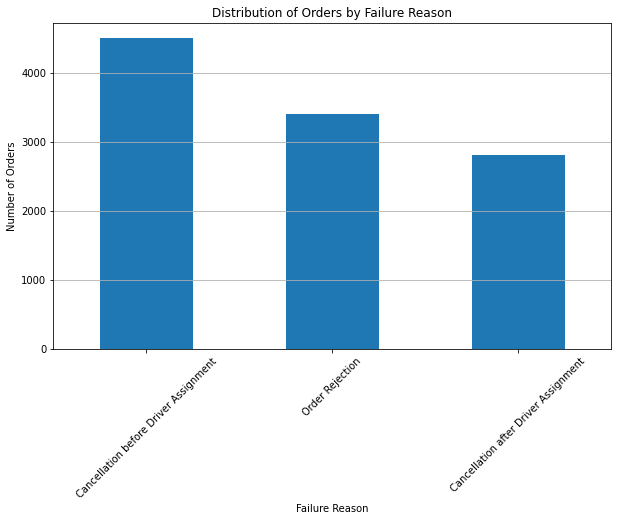

The category with the highest number of orders is 'Cancellation before Driver Assignment' with 4496 orders.


,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,hour,failure_reason
0,2023-09-28 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18,Cancellation after Driver Assignment
1,2023-09-28 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,20,Cancellation before Driver Assignment
2,2023-09-28 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,12,Cancellation after Driver Assignment
3,2023-09-28 13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,13,Cancellation after Driver Assignment
4,2023-09-28 21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,21,Order Rejection
...,...,...,...,...,...,...,...,...,...,...
10711,2023-09-28 13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0,13,Cancellation before Driver Assignment
10712,2023-09-28 13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0,13,Cancellation before Driver Assignment
10713,2023-09-28 13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0,13,Cancellation after Driver Assignment
10714,2023-09-28 13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0,13,Cancellation before Driver Assignment


In [26]:
orders_copy['failure_reason'] = 'Unknown'  # Default to 'Unknown'
orders_copy.loc[(orders_copy['order_status_key'] == 4) & (orders_copy['is_driver_assigned_key'] == 1), 'failure_reason'] = 'Cancellation after Driver Assignment'
orders_copy.loc[(orders_copy['order_status_key'] == 4) & (orders_copy['is_driver_assigned_key'] == 0), 'failure_reason'] = 'Cancellation before Driver Assignment'
orders_copy.loc[(orders_copy['order_status_key'] == 9), 'failure_reason'] = 'Order Rejection'

# Count the number of orders in each category
reason_counts = orders_copy['failure_reason'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
reason_counts.plot(kind='bar')
plt.xlabel('Failure Reason')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Failure Reason')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Find the category with the highest number of orders
max_category = reason_counts.idxmax()
max_orders = reason_counts.max()

print(f"The category with the highest number of orders is '{max_category}' with {max_orders} orders.")

orders_copy